## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [20]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request

## Datos

In [21]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col=0)
df.index.name = None

## Exploración de los datos

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [23]:
variable="Memory"

In [24]:
df[variable].nunique()

37

In [19]:
df[variable].value_counts()

ScreenResolution
Full HD 1920x1080                                349
1366x768                                         211
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         32
Full HD / Touchscreen 1920x1080                   30
1600x900                                          14
Quad HD+ / Touchscreen 3200x1800                  11
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel 4K Ultra HD 3840x2160                    5
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2560x1600                 5
1440x900                                           4
IPS Panel 1366x768                                 4
IPS Panel Retina Display 2304x1440                 4
IPS Panel Touchscreen 2560x14

In [25]:
for value in df[variable].unique():
    print(value)

256GB SSD
1TB HDD
128GB Flash Storage
128GB SSD +  1TB HDD
512GB SSD
500GB HDD
256GB SSD +  256GB SSD
128GB SSD
32GB Flash Storage
64GB Flash Storage
1.0TB Hybrid
2TB HDD
256GB Flash Storage
256GB SSD +  1TB HDD
180GB SSD
16GB Flash Storage
1TB SSD
256GB SSD +  2TB HDD
32GB SSD
1TB SSD +  1TB HDD
128GB SSD +  2TB HDD
512GB SSD +  1TB HDD
512GB SSD +  512GB SSD
512GB SSD +  256GB SSD
16GB SSD
64GB Flash Storage +  1TB HDD
64GB SSD
128GB HDD
240GB SSD
512GB SSD +  2TB HDD
508GB Hybrid
8GB SSD
256GB SSD +  500GB HDD
1.0TB HDD
512GB Flash Storage
1TB HDD +  1TB HDD
32GB HDD


In [26]:
# PCs que tienen solo SSD
solo_ssd = df['Memory'].str.contains('SSD', na=False) & ~df['Memory'].str.contains('HDD', na=False)

# PCs que tienen solo HDD
solo_hdd = df['Memory'].str.contains('HDD', na=False) & ~df['Memory'].str.contains('SSD', na=False)

# PCs que tienen SSD y HDD a la vez
ssd_hdd = df['Memory'].str.contains('SSD', na=False) & df['Memory'].str.contains('HDD', na=False)



# Contamos cada tipo
memory_counts = {
    "Solo SSD": solo_ssd.sum(),
    "Solo HDD": solo_hdd.sum(),
    "SSD y HDD": ssd_hdd.sum(),
    "Flash Storage": df['Memory'].str.contains('Flash Storage', na=False).sum(),
    "Hybrid": df['Memory'].str.contains('Hybrid', na=False).sum()
}

# Convertimos en DataFrame para visualizarlo mejor
df_memory_counts = pd.DataFrame(memory_counts.items(), columns=["Tipo de Memoria", "Cantidad"])
print(df_memory_counts)


  Tipo de Memoria  Cantidad
0        Solo SSD       448
1        Solo HDD       257
2       SSD y HDD       139
3   Flash Storage        63
4          Hybrid         6


In [24]:
solo_ssd = df[df['Memory'].str.contains('SSD', na=False) & ~df['Memory'].str.contains('HDD', na=False)]
solo_ssd.Memory.value_counts()

Memory
256GB SSD                 282
512GB SSD                  83
128GB SSD                  54
1TB SSD                    12
32GB SSD                    5
180GB SSD                   3
16GB SSD                    3
256GB SSD +  256GB SSD      1
512GB SSD +  512GB SSD      1
512GB SSD +  256GB SSD      1
64GB SSD                    1
240GB SSD                   1
8GB SSD                     1
Name: count, dtype: int64

In [27]:
# PCs que tienen solo HDD
solo_hdd = df[df['Memory'].str.contains('HDD', na=False) & ~df['Memory'].str.contains('SSD', na=False)]
solo_hdd.Memory.value_counts()

Memory
1TB HDD                          152
500GB HDD                         92
2TB HDD                            8
64GB Flash Storage +  1TB HDD      1
128GB HDD                          1
1.0TB HDD                          1
1TB HDD +  1TB HDD                 1
32GB HDD                           1
Name: count, dtype: int64

In [28]:
# PCs que tienen SSD y HDD a la vez
ssd_hdd = df[df['Memory'].str.contains('SSD', na=False) & df['Memory'].str.contains('HDD', na=False)]
ssd_hdd.Memory.value_counts()

Memory
128GB SSD +  1TB HDD      67
256GB SSD +  1TB HDD      52
512GB SSD +  1TB HDD       8
256GB SSD +  2TB HDD       6
1TB SSD +  1TB HDD         2
512GB SSD +  2TB HDD       2
128GB SSD +  2TB HDD       1
256GB SSD +  500GB HDD     1
Name: count, dtype: int64

In [28]:
fs= df[df['Memory'].str.contains('Flash Storage', na=False)]
fs.Memory.value_counts()

Memory
32GB Flash Storage               33
64GB Flash Storage               11
256GB Flash Storage               7
16GB Flash Storage                6
128GB Flash Storage               4
64GB Flash Storage +  1TB HDD     1
512GB Flash Storage               1
Name: count, dtype: int64

In [29]:
Hybrid= df[df['Memory'].str.contains('Hybrid', na=False)]
Hybrid.Memory.value_counts()

Memory
1.0TB Hybrid    5
508GB Hybrid    1
Name: count, dtype: int64

In [32]:
import numpy as np
import pandas as pd

# Función para extraer el número de memoria y convertir a GB
def convert_to_gb(memory):
    # Extraemos el número de memoria, ignorando texto como 'GB', 'TB', etc.
    try:
        memory_value = ''.join([char for char in memory if char.isdigit() or char == '.'])
        memory_value = float(memory_value)
        # Si la unidad es TB, la convertimos a GB
        if 'TB' in memory:
            return memory_value * 1024  # 1 TB = 1024 GB
        else:
            return memory_value  # Si ya está en GB, lo dejamos como está
    except ValueError:
        return np.nan  # Si no se puede extraer un valor numérico, devolvemos NaN

# Función para procesar cada valor de la columna 'Memory' que pueda tener múltiples memorias
def process_memory(memory):
    ssd, hdd, flash, hybrid = 0, 0, 0, 0  # Inicializamos las variables de cada tipo de memoria

    # Separamos los valores si hay un '+'
    memories = memory.split(' + ') if isinstance(memory, str) else []
    
    for mem in memories:
        # Revisamos el tipo de memoria y aplicamos la conversión a GB
        if 'SSD' in mem:
            ssd += convert_to_gb(mem)
        elif 'HDD' in mem:
            hdd += convert_to_gb(mem)
        elif 'Flash Storage' in mem:
            flash += convert_to_gb(mem)
        elif 'Hybrid' in mem:
            hybrid += convert_to_gb(mem)

    return ssd, hdd, flash, hybrid

# Aplicamos la función para crear nuevas columnas
df[['SSD_GB', 'HDD_GB', 'Flash_Storage_GB', 'Hybrid_GB']] = df['Memory'].apply(lambda x: pd.Series(process_memory(x)))

# Sumar los valores de las columnas
ssd_sum = df['SSD_GB'].sum()
hdd_sum = df['HDD_GB'].sum()
flash_storage_sum = df['Flash_Storage_GB'].sum()
hybrid_sum = df['Hybrid_GB'].sum()

# Mostrar los resultados
print(f"Suma total de SSD en GB: {ssd_sum} GB")
print(f"Suma total de HDD en GB: {hdd_sum} GB")
print(f"Suma total de Flash Storage en GB: {flash_storage_sum} GB")
print(f"Suma total de Hybrid en GB: {hybrid_sum} GB")


Suma total de SSD en GB: 168228.0 GB
Suma total de HDD en GB: 373316.0 GB
Suma total de Flash Storage en GB: 4736.0 GB
Suma total de Hybrid en GB: 5628.0 GB


In [30]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [31]:
resolucion=df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

In [32]:
resolucion

,0,1
755,1920,1080
618,1920,1080
909,1920,1080
2,1440,900
286,1920,1080
...,...,...
28,1920,1080
1160,1920,1080
78,1920,1080
23,1366,768


In [33]:
pantallas=["Full HD","Touchscreen","IPS","4K","Retina","Quad HD"]
for tipo in pantallas:
    count = df['ScreenResolution'].str.contains(tipo, case=False, na=False).sum()
    print(f"{tipo} -- {count}")

Full HD -- 579
Touchscreen -- 131
IPS -- 251
4K -- 26
Retina -- 12
Quad HD -- 24


In [34]:
df['ScreenResolution'].str.contains("U", case=False, na=False).sum()

661

In [35]:
import pandas as pd
import numpy as np
import re

# Función para extraer resolución (Ancho x Alto)
def extract_resolution(resolution):
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        return int(match.group(1)), int(match.group(2))
    return np.nan, np.nan

# Función para extraer la descripción sin las dimensiones
def extract_description(resolution):
    return re.sub(r'\d+x\d+', '', resolution).strip()

# Aplicamos la función a la columna 'ScreenResolution'
df[['Width', 'Height']] = df['ScreenResolution'].apply(lambda x: pd.Series(extract_resolution(x)))

# Calculamos el PPI
df['PPI'] = ((df['Width']**2 + df['Height']**2) ** 0.5) / df['Inches']

# Extraemos la descripción de la pantalla sin las dimensiones
df['Description'] = df['ScreenResolution'].apply(extract_description)

# Creamos el nuevo DataFrame con los campos requeridos
df_screens = df[['Description', 'Width', 'Height', 'Inches', 'Price_in_euros', 'PPI']].copy()

# Mostramos el resultado
print(df_screens.head())


    Description  Width  Height  Inches  Price_in_euros         PPI
755     Full HD   1920    1080    15.6          539.00  141.211998
618     Full HD   1920    1080    15.6          879.01  141.211998
909     Full HD   1920    1080    15.6          900.00  141.211998
2                 1440     900    13.3          898.94  127.677940
286     Full HD   1920    1080    15.6          428.00  141.211998


In [11]:
df_screens.Description.value_counts()

Description
Full HD                                349
                                       232
IPS Panel Full HD                      167
IPS Panel Full HD / Touchscreen         32
Full HD / Touchscreen                   30
Touchscreen                             24
IPS Panel Retina Display                12
Quad HD+ / Touchscreen                  11
IPS Panel 4K Ultra HD / Touchscreen     10
IPS Panel Touchscreen                    8
4K Ultra HD / Touchscreen                7
IPS Panel                                7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel 4K Ultra HD                    5
IPS Panel Quad HD+                       4
4K Ultra HD                              3
Quad HD+                                 2
Touchscreen / Quad HD+                   1
Touchscreen / 4K Ultra HD                1
Touchscreen / Full HD                    1
Name: count, dtype: int64

In [36]:
df_touchscreen = df_screens[df['ScreenResolution'].str.contains('Touchscreen', case=1, na=0)]

In [37]:
df['Touchscreen'] = df['Description'].str.contains('touchscreen', case=False, na=False).astype(int)



In [18]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,Resolution_Width,Resolution_Height,Width,Height,PPI,Description,Touchscreen
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,1920,1080,1920,1080,141.211998,Full HD,0
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,1920,1080,1920,1080,141.211998,Full HD,0
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,1920,1080,1920,1080,141.211998,Full HD,0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440,900,127.677940,,0
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,1920,1080,1920,1080,141.211998,Full HD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,1920,1080,1920,1080,141.211998,Full HD,0
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,1920,1080,1920,1080,165.632118,Full HD / Touchscreen,1
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,1920,1080,1920,1080,141.211998,Full HD,0
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,1366,768,1366,768,100.454670,,0


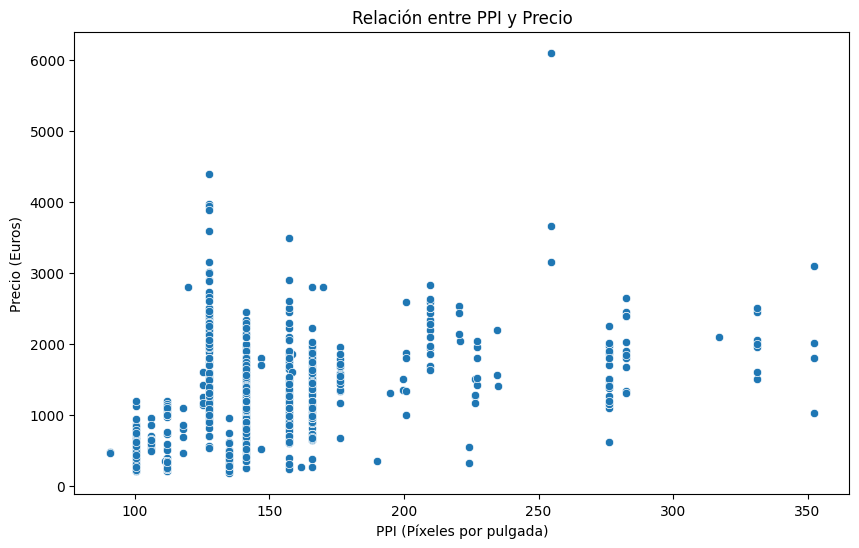

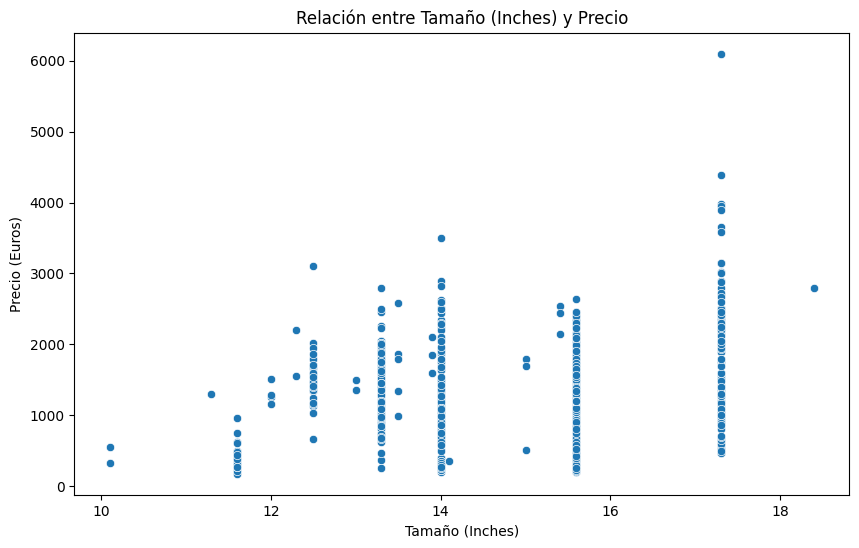

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre PPI y Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_screens, x='PPI', y='Price_in_euros')
plt.title('Relación entre PPI y Precio')
plt.xlabel('PPI (Píxeles por pulgada)')
plt.ylabel('Precio (Euros)')
plt.show()

# Gráfico de dispersión entre Inches y Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_screens, x='Inches', y='Price_in_euros')
plt.title('Relación entre Tamaño (Inches) y Precio')
plt.xlabel('Tamaño (Inches)')
plt.ylabel('Precio (Euros)')
plt.show()


In [41]:
import pandas as pd
import numpy as np
import re

# Lista de términos a buscar
terms = ["Full HD", "Touchscreen", "IPS", "4K", "Retina", "Quad HD"]

# Función para verificar la presencia de cada término
def check_terms(resolution):
    return [1 if re.search(term, resolution, re.IGNORECASE) else 0 for term in terms]

# Aplicamos la función para crear nuevas columnas
df_screens[terms] = df_screens['Description'].apply(lambda x: pd.Series(check_terms(x)))

# Mostramos las primeras filas del DataFrame actualizado
df_screens.head()


,Description,Width,Height,Inches,Price_in_euros,PPI,Full HD,Touchscreen,IPS,4K,Retina,Quad HD
755,Full HD,1920,1080,15.6,539.00,141.211998,1,0,0,0,0,0
618,Full HD,1920,1080,15.6,879.01,141.211998,1,0,0,0,0,0
909,Full HD,1920,1080,15.6,900.00,141.211998,1,0,0,0,0,0
2,,1440,900,13.3,898.94,127.677940,0,0,0,0,0,0
286,Full HD,1920,1080,15.6,428.00,141.211998,1,0,0,0,0,0


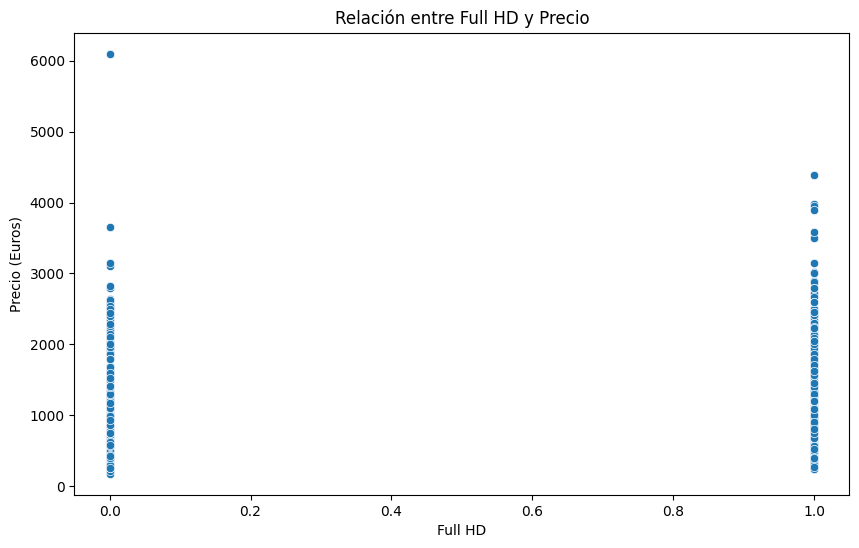

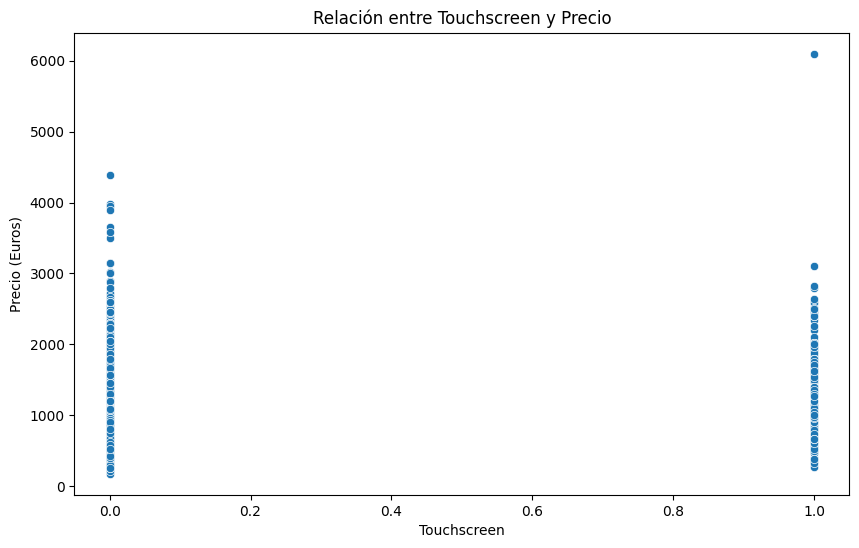

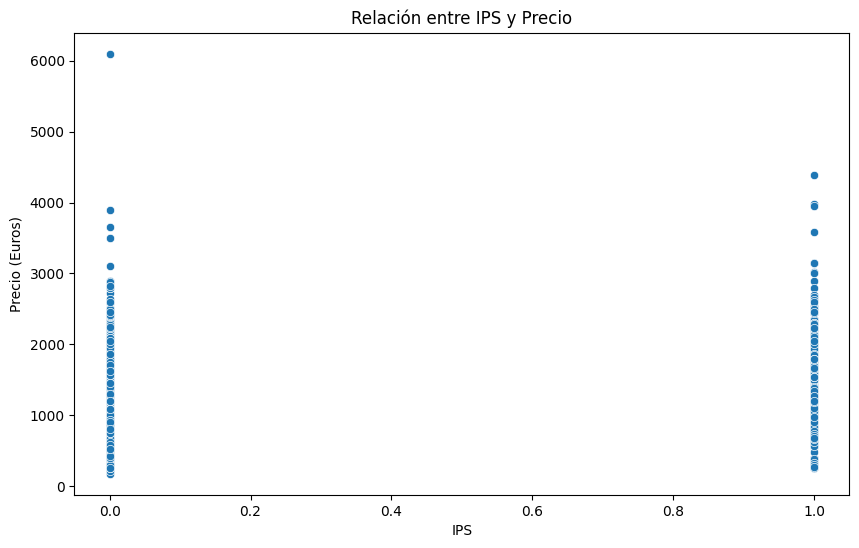

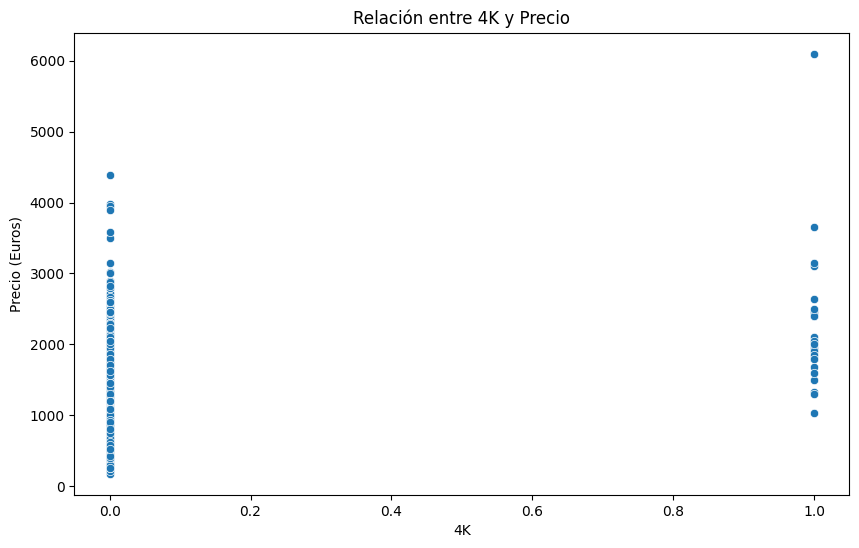

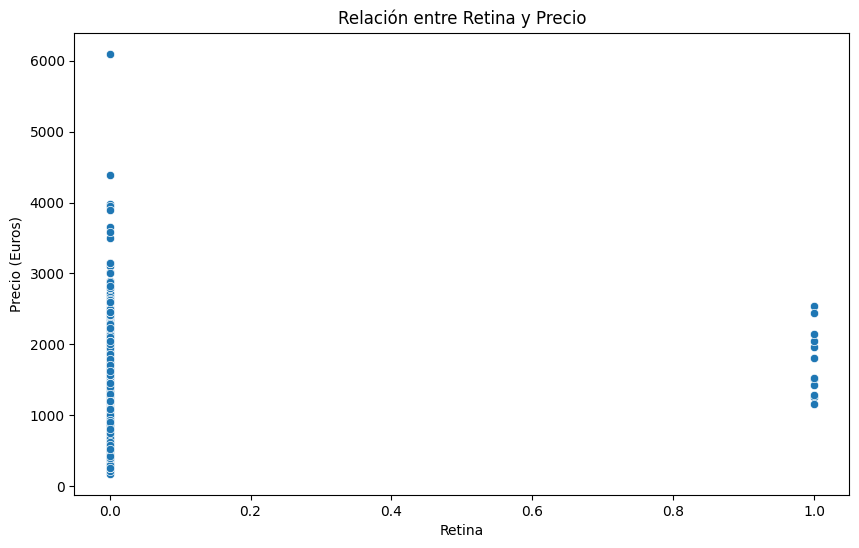

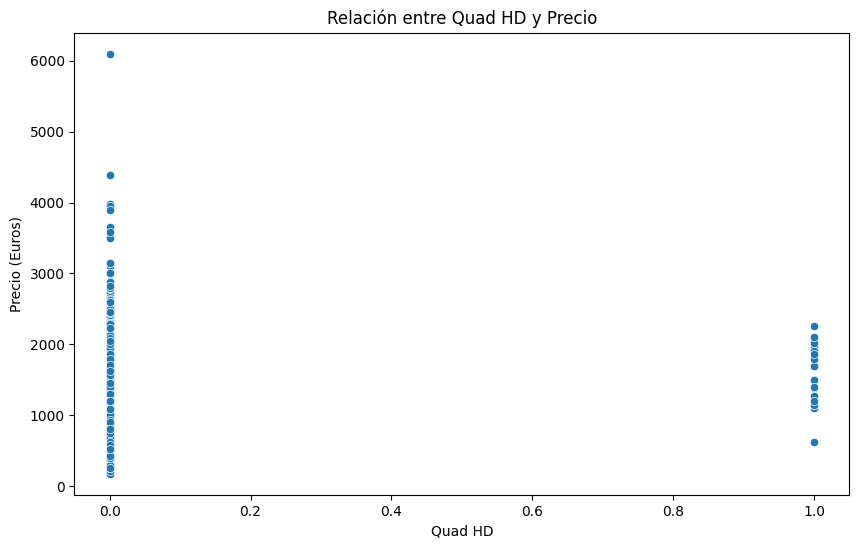

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
for tipo in terms:
    # Gráfico de dispersión entre PPI y Precio
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_screens, x=tipo, y='Price_in_euros')
    plt.title(f'Relación entre {tipo} y Precio')
    plt.xlabel(f'{tipo}')
    plt.ylabel('Precio (Euros)')
    plt.show()



## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [43]:
target = df["Price_in_euros"]

In [4]:
df["inches"]=df.Inches.astype(float)
df["ram_gb"]=df["Ram"].str.replace("GB","").astype(int)
df["weight_kg"]=df["Weight"].str.replace("kg","").astype(float)
df = pd.get_dummies(df, columns=['TypeName'], prefix='Type')

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  912 non-null    object 
 1   Product                  912 non-null    object 
 2   Inches                   912 non-null    float64
 3   ScreenResolution         912 non-null    object 
 4   Cpu                      912 non-null    object 
 5   Ram                      912 non-null    object 
 6   Memory                   912 non-null    object 
 7   Gpu                      912 non-null    object 
 8   OpSys                    912 non-null    object 
 9   Weight                   912 non-null    object 
 10  Price_in_euros           912 non-null    float64
 11  inches                   912 non-null    float64
 12  ram_gb                   912 non-null    int32  
 13  weight_kg                912 non-null    float64
 14  Type_2 in 1 Convertible  912 

In [ ]:
"""
X = df.drop(['Price_in_euros',"Weight","Inches","Ram"], axis=1)
y = df['Price_in_euros'].copy()
X.shape
"""

In [6]:
X = df.iloc[:,11:].copy()
y = df["Price_in_euros"].copy()

In [7]:
X.shape

(912, 9)

In [8]:
X.head()

,inches,ram_gb,weight_kg,Type_2 in 1 Convertible,Type_Gaming,Type_Netbook,Type_Notebook,Type_Ultrabook,Type_Workstation
755,15.6,8,1.86,False,False,False,True,False,False
618,15.6,16,2.59,False,True,False,False,False,False
909,15.6,8,2.04,False,False,False,True,False,False
2,13.3,8,1.34,False,False,False,False,True,False
286,15.6,4,2.25,False,False,False,True,False,False


In [ ]:
y.shape

In [ ]:
y.head()

### 2. Dividir X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train

In [ ]:
y_train

### 3. Baseline de modelos


In [10]:
dfmodel = RandomForestRegressor()

dfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [11]:
y_pred=dfmodel.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [12]:
RMSE = root_mean_squared_error(y_test,y_pred)
RMSE

442.62977651881056

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [23]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [15]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [24]:
X_pred["inches"]=X_pred.Inches.astype(float)
X_pred["ram_gb"]=X_pred["Ram"].str.replace("GB","").astype(int)
X_pred["weight_kg"]=X_pred["Weight"].str.replace("kg","").astype(float)
X_pred = pd.get_dummies(X_pred, columns=['TypeName'], prefix='Type')

In [17]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  391 non-null    object 
 1   Product                  391 non-null    object 
 2   Inches                   391 non-null    float64
 3   ScreenResolution         391 non-null    object 
 4   Cpu                      391 non-null    object 
 5   Ram                      391 non-null    object 
 6   Memory                   391 non-null    object 
 7   Gpu                      391 non-null    object 
 8   OpSys                    391 non-null    object 
 9   Weight                   391 non-null    object 
 10  inches                   391 non-null    float64
 11  ram_gb                   391 non-null    int32  
 12  weight_kg                391 non-null    float64
 13  Type_2 in 1 Convertible  391 non-null    bool   
 14  Type_Gaming              391 

In [25]:
X_pred = X_pred.iloc[:,10:].copy()

 ## 2. Replicar el procesado para ``test.csv``

In [26]:
X_pred

,inches,ram_gb,weight_kg,Type_2 in 1 Convertible,Type_Gaming,Type_Netbook,Type_Notebook,Type_Ultrabook,Type_Workstation
209,15.6,16,2.400,False,True,False,False,False,False
1281,15.6,4,2.400,False,False,False,True,False,False
1168,15.6,4,1.900,False,False,False,True,False,False
1231,15.6,8,2.191,True,False,False,False,False,False
1020,14.0,4,1.950,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
820,17.3,16,2.900,False,True,False,False,False,False
948,14.0,4,1.470,False,False,False,True,False,False
483,15.6,8,1.780,False,False,False,False,False,True
1017,14.0,4,1.640,False,False,False,True,False,False


In [27]:
predictions_submit = dfmodel.predict(X_pred)
predictions_submit

array([1578.34418333,  410.60556246,  492.98845846,  819.21027705,
       1078.3275    ,  592.35918   ,  708.26823104,  706.46894437,
       1114.83304667,  545.4196    , 2277.96388095, 1679.32760844,
        499.20703905, 1462.30386667, 1074.82380571,  421.75412547,
       2216.78293333, 1437.31361429, 1704.28102   ,  608.13591825,
       1423.30386667,  416.6       , 1091.64048485, 1599.25859167,
        474.01936111,  740.94792646, 1138.87      ,  874.79266667,
       2449.23536667, 1090.12055857, 1848.88411952,  462.97310786,
       1399.62054687, 3184.53764833, 2043.39763333, 2001.7629816 ,
        631.56347962, 1397.76080556,  831.69513333, 1688.28428095,
       1024.90395897, 1242.08769328,  560.17048845, 1090.12055857,
       1536.59899206, 1078.36142053,  935.99914656,  462.97310786,
        740.94792646,  473.81746871, 2157.9876    ,  740.94792646,
       1160.3069733 ,  659.70586841, 1811.48470952, 1971.104     ,
        580.03947148,  905.11229502,  968.48132857,  735.55557

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

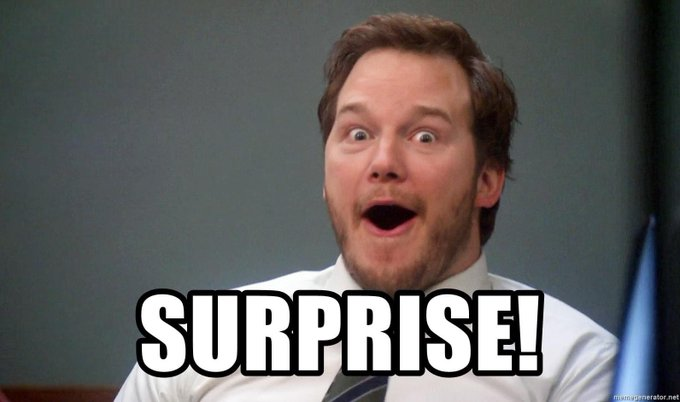

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [28]:
sample = pd.read_csv("data/sample_submission.csv")

In [29]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [30]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [31]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID":X_pred.index,"Price_in_euros":predictions_submit})

In [32]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1578.344183
1,1281,410.605562
2,1168,492.988458
3,1231,819.210277
4,1020,1078.327500


In [33]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [35]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [36]:
chequeador(submission)

You're ready to submit!
